In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

### Question 2 :

In [2]:
#---Choosing some attractive stocks from attached file

stock_list = ['AAPL','ABEV','F','GOOG','QQQ','TEVA']
# stock_list = ['AAPL','ABEV']
stock_data = pd.read_csv('stock_data.csv', usecols=['Date']+stock_list, index_col='Date')
stock_data.head()

,AAPL,ABEV,F,GOOG,QQQ,TEVA
Date,,,,,,
2013-12-31,80.15,7.35,15.43,559.79,87.96,40.08
2014-01-02,79.02,7.28,15.44,556.00,87.27,40.26
2014-01-03,77.28,7.14,15.51,551.95,86.64,39.88
2014-01-06,77.70,6.98,15.58,558.10,86.32,40.49
2014-01-07,77.15,7.25,15.38,568.86,87.12,41.21


In [3]:
stock_data.shape

(757, 6)

In [4]:
stock_data.tail()

,AAPL,ABEV,F,GOOG,QQQ,TEVA
Date,,,,,,
2016-12-23,116.52,4.86,12.46,789.91,120.20,36.82
2016-12-27,117.26,4.89,12.39,791.55,120.82,36.34
2016-12-28,116.76,4.91,12.25,785.05,119.88,35.93
2016-12-29,116.73,4.95,12.23,782.79,119.71,36.08
2016-12-30,115.82,4.91,12.13,771.82,118.48,36.25


In [5]:
#---Calculating percent of daily returt for each stock.
daily_return_data = stock_data.pct_change()[1:]
daily_return_data

,AAPL,ABEV,F,GOOG,QQQ,TEVA
Date,,,,,,
2014-01-02,-0.014099,-0.009524,0.000648,-0.006770,-0.007844,0.004491
2014-01-03,-0.022020,-0.019231,0.004534,-0.007284,-0.007219,-0.009439
2014-01-06,0.005435,-0.022409,0.004513,0.011142,-0.003693,0.015296
2014-01-07,-0.007079,0.038682,-0.012837,0.019280,0.009268,0.017782
2014-01-08,0.006351,0.000000,0.010403,0.002074,0.002181,-0.003883
...,...,...,...,...,...,...
2016-12-23,0.001978,0.018868,0.004839,-0.001706,0.000666,-0.002438
2016-12-27,0.006351,0.006173,-0.005618,0.002076,0.005158,-0.013036
2016-12-28,-0.004264,0.004090,-0.011299,-0.008212,-0.007780,-0.011282


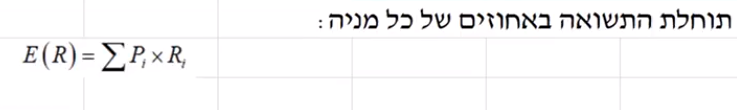
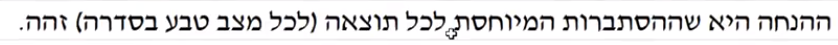

In [6]:
Expected_asset_return = (daily_return_data*(1/765)).sum()
Expected_asset_return

AAPL    0.000594
ABEV   -0.000353
F      -0.000209
GOOG    0.000531
QQQ     0.000440
TEVA    0.000021
dtype: float64

In [7]:
#---Get mean return for 3 years period
total_return = daily_return_data.mean()
total_return

AAPL    0.000601
ABEV   -0.000357
F      -0.000211
GOOG    0.000537
QQQ     0.000445
TEVA    0.000021
dtype: float64

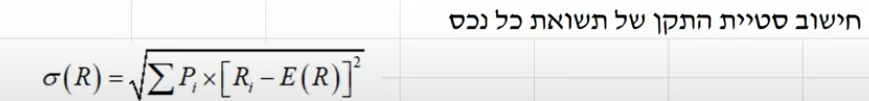

In [8]:
asset_std = ((1/765)*(daily_return_data-Expected_asset_return)**2).sum()
asset_std

AAPL    0.000226
ABEV    0.000348
F       0.000210
GOOG    0.000225
QQQ     0.000101
TEVA    0.000307
dtype: float64

In [9]:
points = pd.concat([Expected_asset_return, asset_std], axis=1).rename(columns={0: 'E(R)', 1: 'std(R)'})
points

,E(R),std(R)
AAPL,0.000594,0.000226
ABEV,-0.000353,0.000348
F,-0.000209,0.000210
GOOG,0.000531,0.000225
QQQ,0.000440,0.000101
TEVA,0.000021,0.000307


In [10]:
#---Creating random weights for each asset in portfolio

np.random.seed(125)
weights = np.random.dirichlet(np.ones(len(stock_list)),size=1)
print(weights)
print('weights sum: ',weights.sum())

[[0.19684291 0.01650414 0.27512502 0.03960875 0.03913796 0.43278122]]
weights sum:  1.0


In [11]:
#---Adding weights column to the Points dataFrame
w =[]
for i in range(len(stock_list)):
    w.append(weights[0,i])
 
weights_dict = {"W": w}
weights_dict = pd.DataFrame(weights_dict, index = stock_list )
points= pd.concat([points,weights_dict], axis=1)
points

,E(R),std(R),W
AAPL,0.000594,0.000226,0.196843
ABEV,-0.000353,0.000348,0.016504
F,-0.000209,0.000210,0.275125
GOOG,0.000531,0.000225,0.039609
QQQ,0.000440,0.000101,0.039138
TEVA,0.000021,0.000307,0.432781


In [12]:
#-- Get covariances
cov = daily_return_data.cov()
cov

,AAPL,ABEV,F,GOOG,QQQ,TEVA
AAPL,0.000229,0.000069,0.000077,0.000084,0.000104,0.000051
ABEV,0.000069,0.000353,0.000071,0.000067,0.000076,0.000034
F,0.000077,0.000071,0.000213,0.000077,0.000085,0.000064
GOOG,0.000084,0.000067,0.000077,0.000228,0.000110,0.000068
QQQ,0.000104,0.000076,0.000085,0.000110,0.000102,0.000066
TEVA,0.000051,0.000034,0.000064,0.000068,0.000066,0.000312


In [13]:
cov_matrix = cov.to_numpy()
cov_matrix

array([[2.28681529e-04, 6.90763676e-05, 7.70602673e-05, 8.40056310e-05,
        1.03673570e-04, 5.05611509e-05],
       [6.90763676e-05, 3.52719524e-04, 7.07266849e-05, 6.69782303e-05,
        7.63894628e-05, 3.37701981e-05],
       [7.70602673e-05, 7.07266849e-05, 2.13118925e-04, 7.72250900e-05,
        8.45873181e-05, 6.41665951e-05],
       [8.40056310e-05, 6.69782303e-05, 7.72250900e-05, 2.27732976e-04,
        1.10089086e-04, 6.78165228e-05],
       [1.03673570e-04, 7.63894628e-05, 8.45873181e-05, 1.10089086e-04,
        1.02384207e-04, 6.62983559e-05],
       [5.05611509e-05, 3.37701981e-05, 6.41665951e-05, 6.78165228e-05,
        6.62983559e-05, 3.11535535e-04]])

In [14]:
vector_w = weights_dict['W'].to_numpy()
vector_w

array([0.19684291, 0.01650414, 0.27512502, 0.03960875, 0.03913796,
       0.43278122])

In [15]:
portfolio_expected_val = (points['E(R)']*points['W']).sum()
portfolio_std = (vector_w.dot(cov_matrix)).dot(vector_w.transpose())

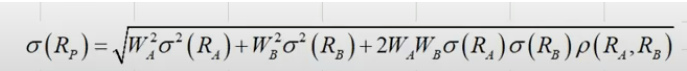

In [16]:
class Point:
    
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def percent_format(self):
        self.x = round((self.x*100),3)
        self.y = round((self.y*100),3)
        
    def __repr__(self):
        return '({}%,{}%)'.format(self.x,self.y)
    
p1= Point(portfolio_std, portfolio_expected_val)
p1.percent_format()
print(p1)

(0.013%,0.01%)


### Creating 100 random portfolios by generating random weights of 6 assets

Text(0, 0.5, 'Portfolio expected return in %')

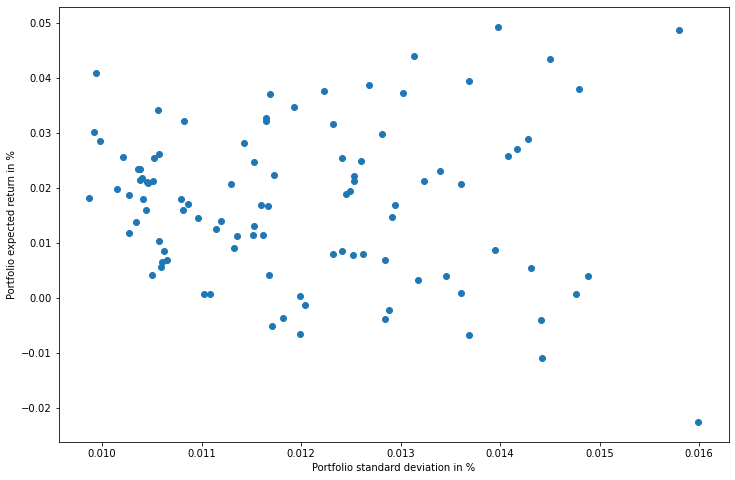

In [17]:
x = []
y = []
for i in range(100):
    np.random.seed()
    weights = np.random.dirichlet(np.ones(len(stock_list)),size=1)

    w =[]
    for i in range(len(stock_list)):
        w.append(weights[0,i])

    weights_dict = {"W": w}
    weights_dict = pd.DataFrame(weights_dict, index = stock_list )
    points_i = pd.concat([points[['E(R)','std(R)']],weights_dict], axis=1)
#     print(points_i)
    cov_i = daily_return_data.cov()
    cov_matrix_i = cov.to_numpy()
    vector_w_i = weights_dict['W'].to_numpy()
    portfolio_i_expected_val = (points_i['E(R)']*points_i['W']).sum()
    portfolio_i_std = (vector_w_i.dot(cov_matrix_i)).dot(vector_w_i.transpose())
#     print(portfolio_i_expected_val)
#     print(portfolio_i_std)
    x.append(portfolio_i_std)
    y.append(portfolio_i_expected_val)

    
#--Ploting random portfolios    
plt.figure(figsize=(12, 8))
df = pd.DataFrame({'X':x,'Y':y})*100
plt.scatter(df['X'],df['Y'])
plt.xlabel('Portfolio standard deviation in %')
plt.ylabel('Portfolio expected return in %')

In [26]:
mean_variance_pairs = np.array(df)

risk_free_rate=0 #-- Include risk free rate here

fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,0], y=mean_variance_pairs[:,1], 
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  width=850,
                  height=500)
# fig.update_xaxes(range=[0.18, 0.32])
# fig.update_yaxes(range=[0.02,0.27])
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))

### Sample only from efficient frontier

In [27]:
#-- Create random portfolio weights and indexes
#- How many assests in the portfolio
n_assets = len(stock_list)

mean_variance_pairs = []
weights_list=[]
tickers_list=[]
mus= daily_return_data.mean()
for i in tqdm(range(10000)):
    next_i = False
    while True:
        #- Choose assets randomly without replacement
        assets = np.random.choice(list(daily_return_data.columns), n_assets, replace=False)
        #- Choose weights randomly ensuring they sum to one
        weights = np.random.rand(n_assets)
        weights = weights/sum(weights)

        #-- Loop over asset pairs and compute portfolio return and variance
        portfolio_E_Variance = 0
        portfolio_E_Return = 0
        for i in range(len(assets)):
            portfolio_E_Return += weights[i] * mus.loc[assets[i]]
            for j in range(len(assets)):
                portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]

        #-- Skip over dominated portfolios
        for R,V in mean_variance_pairs:
            if (R > portfolio_E_Return) & (V < portfolio_E_Variance):
                next_i = True
                break
        if next_i:
            break

        #-- Add the mean/variance pairs to a list for plotting
        mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])
        weights_list.append(weights)
        tickers_list.append(assets)
        break

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1125.67it/s]


In [23]:
len(mean_variance_pairs)

70

In [28]:
#-- Plot the risk vs. return of randomly generated portfolios
#-- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)

risk_free_rate=0 #-- Include risk free rate here

fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, y=mean_variance_pairs[:,0], 
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers',
                      text=[str(np.array(tickers_list[i])) + "<br>" + str(np.array(weights_list[i]).round(2)) for i in range(len(tickers_list))]))
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  width=850,
                  height=500)
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))
